# МОСиСА лабораторная 5

**1.** Изучить статью о GCN в том числе изучить описание датасета, который используется в данной статье.  
**2.** Скачать пример кода GCN из указанной статьи и проверить его работоспособность

# Graph Convolutional Networks

In [ ]:
!pip -q install torch_geometric

In [ ]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
from torch_geometric.datasets import KarateClub

# Импорт датасета из PyTorch Geometric
dataset = KarateClub()

print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [ ]:
# Print first element
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [ ]:
data = dataset[0]

print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [ ]:
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)

edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3, 

In [ ]:
from torch_geometric.utils import to_dense_adj

A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [ ]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [ ]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


In [ ]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


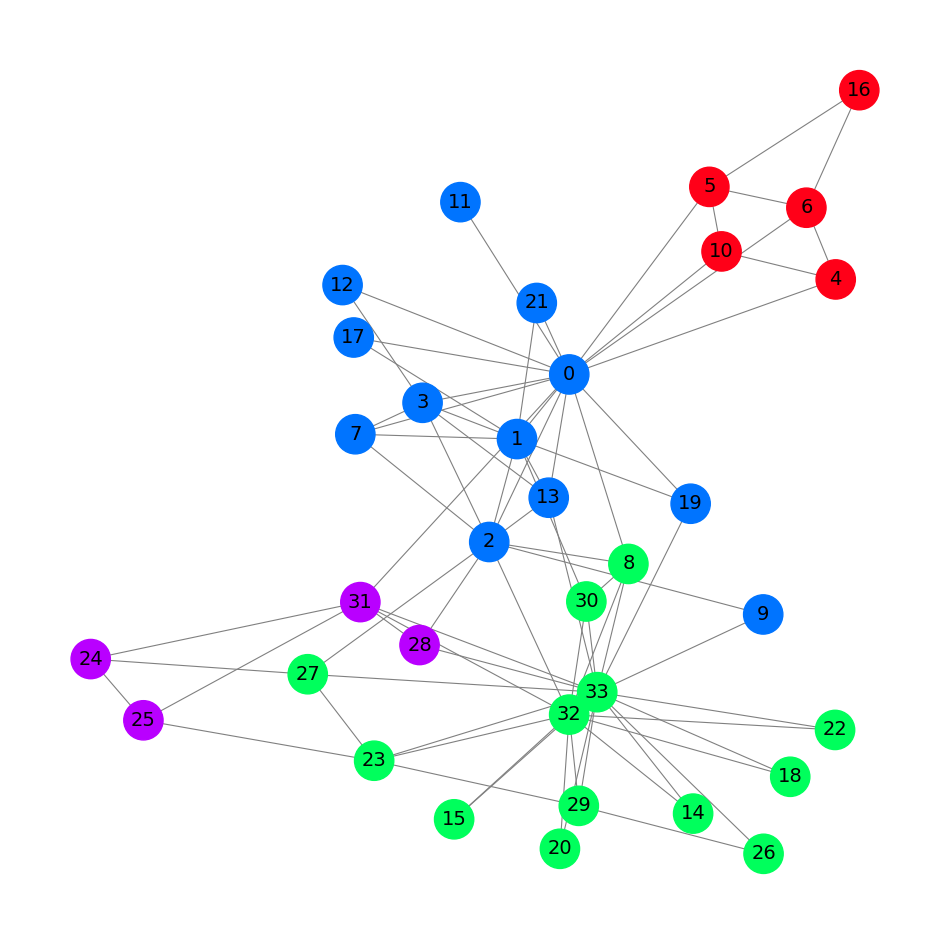

In [ ]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

In [ ]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

model = GCN()
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []

# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()

    # Forward pass
    h, z = model(data.x, data.edge_index)

    # Calculate loss function
    loss = criterion(z, data.y)

    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), data.y)

    # Compute gradients
    loss.backward()

    # Tune parameters
    optimizer.step()

    # Store data for animations
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))

    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 1.37 | Acc: 26.47%
Epoch  10 | Loss: 1.18 | Acc: 67.65%
Epoch  20 | Loss: 0.98 | Acc: 73.53%
Epoch  30 | Loss: 0.77 | Acc: 73.53%
Epoch  40 | Loss: 0.58 | Acc: 73.53%
Epoch  50 | Loss: 0.44 | Acc: 88.24%
Epoch  60 | Loss: 0.35 | Acc: 88.24%
Epoch  70 | Loss: 0.29 | Acc: 88.24%
Epoch  80 | Loss: 0.26 | Acc: 88.24%
Epoch  90 | Loss: 0.23 | Acc: 88.24%
Epoch 100 | Loss: 0.21 | Acc: 88.24%
Epoch 110 | Loss: 0.19 | Acc: 88.24%
Epoch 120 | Loss: 0.16 | Acc: 88.24%
Epoch 130 | Loss: 0.13 | Acc: 94.12%
Epoch 140 | Loss: 0.10 | Acc: 97.06%
Epoch 150 | Loss: 0.07 | Acc: 100.00%
Epoch 160 | Loss: 0.06 | Acc: 100.00%
Epoch 170 | Loss: 0.04 | Acc: 100.00%
Epoch 180 | Loss: 0.03 | Acc: 100.00%
Epoch 190 | Loss: 0.03 | Acc: 100.00%
Epoch 200 | Loss: 0.02 | Acc: 100.00%


In [ ]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

def animate(i):
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=outputs[i],
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=20)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')

anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, 200, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())

In [ ]:
display(html)

In [ ]:
print(f'Final embeddings = {h.shape}')
print(h)

Final embeddings = torch.Size([34, 3])
tensor([[2.7105e+00, 4.0599e+00, 1.9365e-01],
        [3.3575e+00, 2.4423e+00, 6.5449e-01],
        [2.5061e+00, 1.5608e+00, 6.0464e-01],
        [2.6958e+00, 2.3354e+00, 4.6034e-01],
        [4.1265e-03, 3.4963e+00, 1.6433e-01],
        [0.0000e+00, 3.9550e+00, 1.8095e-01],
        [6.6031e-03, 3.9389e+00, 1.6544e-01],
        [2.0952e+00, 1.9611e+00, 4.5962e-01],
        [1.2716e+00, 1.5815e-01, 1.5920e+00],
        [1.8928e+00, 1.4987e+00, 5.1618e-01],
        [3.3580e-03, 3.4966e+00, 1.6068e-01],
        [2.2719e+00, 2.0549e+00, 5.9080e-01],
        [2.1622e+00, 2.0625e+00, 5.7135e-01],
        [1.9741e+00, 1.6859e+00, 6.3222e-01],
        [1.2924e+00, 0.0000e+00, 1.7365e+00],
        [1.1874e+00, 0.0000e+00, 1.7606e+00],
        [0.0000e+00, 3.6988e+00, 2.9301e-01],
        [2.1499e+00, 2.0486e+00, 6.7060e-01],
        [1.3211e+00, 0.0000e+00, 1.7250e+00],
        [1.9608e+00, 1.7181e+00, 5.9742e-01],
        [1.3244e+00, 0.0000e+00, 1.7147e+

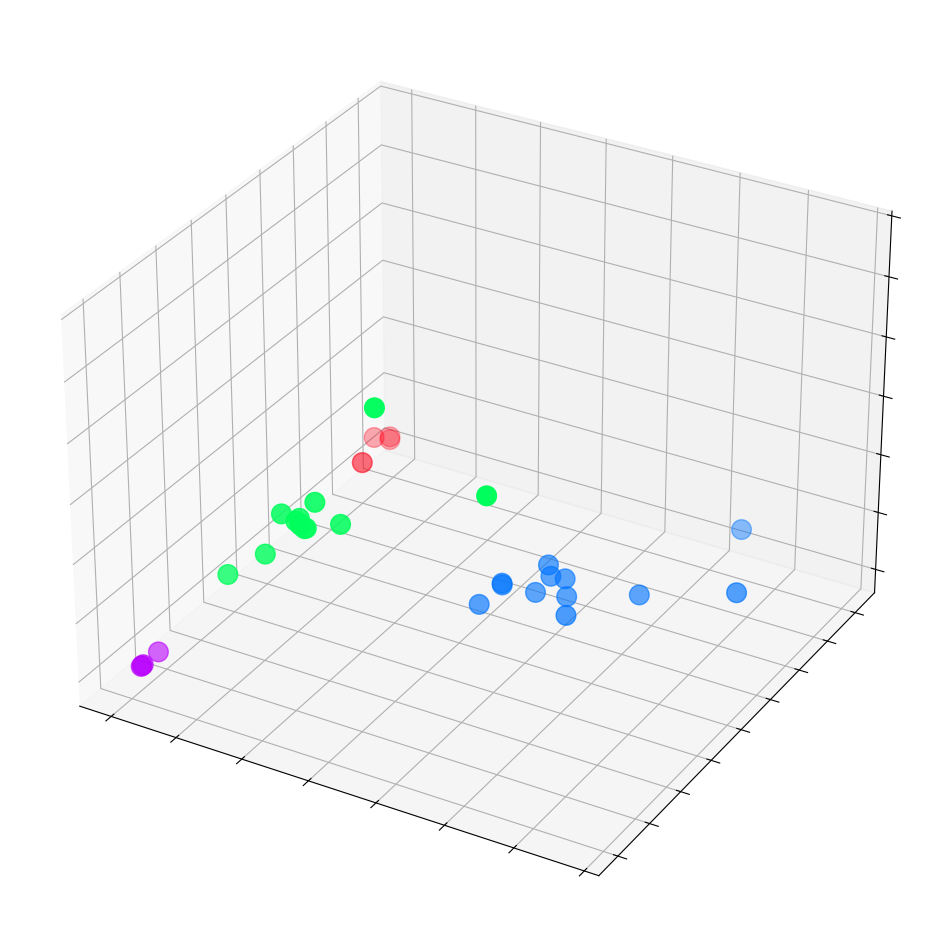

In [ ]:
# Get first embedding at epoch = 0
embed = h.detach().cpu().numpy()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.patch.set_alpha(0)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)

plt.show()

In [ ]:
%%capture

def animate(i):
    embed = embeddings[i].detach().cpu().numpy()
    ax.clear()
    ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=40)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')
ax = fig.add_subplot(projection='3d')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

anim = animation.FuncAnimation(fig, animate, \
              np.arange(0, 200, 10), interval=800, repeat=True)
html = HTML(anim.to_html5_video())

In [ ]:
display(html)

**3.** Заменить в примере кода исходный датасет по карате клубу на любой другой датасет и решить задачу классификации (кроме встроенного датасета в Torch).

Покупки политических книг на Amazon

In [ ]:
import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/26249c33801b445b625ef85b1706854ff45aa1a3/sample-datasets/political-books/political-books-edges.csv"

response = requests.get(url)
csv_data = StringIO(response.text)
edges_df = pd.read_csv(csv_data)
print(edges_df.head())

   Source  Target  Weight
0       1       0       1
1       2       0       1
2       3       0       1
3       3       1       1
4       4       0       1


In [ ]:
G = nx.Graph()

for _, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row.get('Weight', 1.0))

print(f"Узлов: {G.number_of_nodes()}")
print(f"Рёбер: {G.number_of_edges()}")

Узлов: 105
Рёбер: 441


In [ ]:
# Загрузка CSV с метками узлов
nodes_url = "https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/26249c33801b445b625ef85b1706854ff45aa1a3/sample-datasets/political-books/political-books-nodes.csv"
response = requests.get(nodes_url)
csv_data = StringIO(response.text)

nodes_df = pd.read_csv(
    csv_data,
    delimiter=',',
    quotechar='"',
    on_bad_lines='skip'
)

print(nodes_df.head())

   Id                    Label political_ideology
0   0   1000 Years for Revenge            neutral
1   1     Bush vs. the Beltway       conservative
2   2     Charlie Wilson's War       conservative
3   3         Losing Bin Laden       conservative
4   4  Sleeping With the Devil            neutral


In [ ]:
# Построение графа
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_labels = le.fit_transform(nodes_df['political_ideology'])
print(le.classes_)

['conservative' 'liberal' 'neutral']


In [ ]:
valid_parties = {'neutral', 'conservative', 'liberal'}
nodes_df = nodes_df[nodes_df['political_ideology'].isin(valid_parties)]

In [ ]:
party_map = {
    'neutral': 0,
    'conservative': 1,
    'liberal': 2
}

# Добавляем метки в граф
for _, row in nodes_df.iterrows():
    if row['Id'] in G.nodes:
        G.nodes[row['Id']]['party'] = party_map[row['political_ideology']]

In [ ]:
nodes_with_labels = [n for n in G.nodes if 'party' in G.nodes[n]]
labels = torch.tensor([G.nodes[n]['party'] for n in nodes_with_labels])

# Проверим
print("Уникальные числовые метки:", labels.unique())

Уникальные числовые метки: tensor([0, 1, 2])


In [ ]:
party_map = {
    'neutral': 0,
    'conservative': 1,
    'liberal': 2
}
for _, row in nodes_df.iterrows():
    if row['Id'] in G.nodes:
        G.nodes[row['Id']]['party'] = party_map.get(row['political_ideology'], 0)

In [ ]:
from torch_geometric.utils import from_networkx

In [ ]:
# Конвертация в PyG
data = from_networkx(G)
data.x = torch.ones((data.num_nodes, 1))  # Фичи
data.y = torch.tensor([G.nodes[node].get('party', 0) for node in G.nodes()])  # Метки

print(f"Узлов: {data.num_nodes}, Рёбер: {data.num_edges}, Классов: {data.y.max().item() + 1}")

Узлов: 105, Рёбер: 882, Классов: 3


In [ ]:
# Print first element
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [ ]:
data = dataset[0]

print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [ ]:
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)

edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3, 

In [ ]:
from torch_geometric.utils import to_dense_adj

A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [ ]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [ ]:
# Добавление масок
data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.val_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)

In [ ]:
# Разделение данных (80% train, 10% val, 10% test)
indices = torch.randperm(data.num_nodes)
train_size = int(0.8 * data.num_nodes)
val_size = int(0.1 * data.num_nodes)

In [ ]:
data.train_mask[indices[:train_size]] = True
data.val_mask[indices[train_size:train_size + val_size]] = True
data.test_mask[indices[train_size + val_size:]] = True

In [ ]:
# Проверка
print(f"Узлов: {data.num_nodes}, Рёбер: {data.num_edges}, Классов: {data.y.max().item() + 1}")
print(f"Train samples: {data.train_mask.sum().item()}")
print(f"Val samples: {data.val_mask.sum().item()}")
print(f"Test samples: {data.test_mask.sum().item()}")

Узлов: 34, Рёбер: 156, Классов: 4
Train samples: 27
Val samples: 3
Test samples: 4


In [ ]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True,  True, False,  True,  True,  True, False,  True,  True,  True,
         True,  True,  True,  True, False, False, False,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,  True,
        False,  True,  True,  True])


In [ ]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


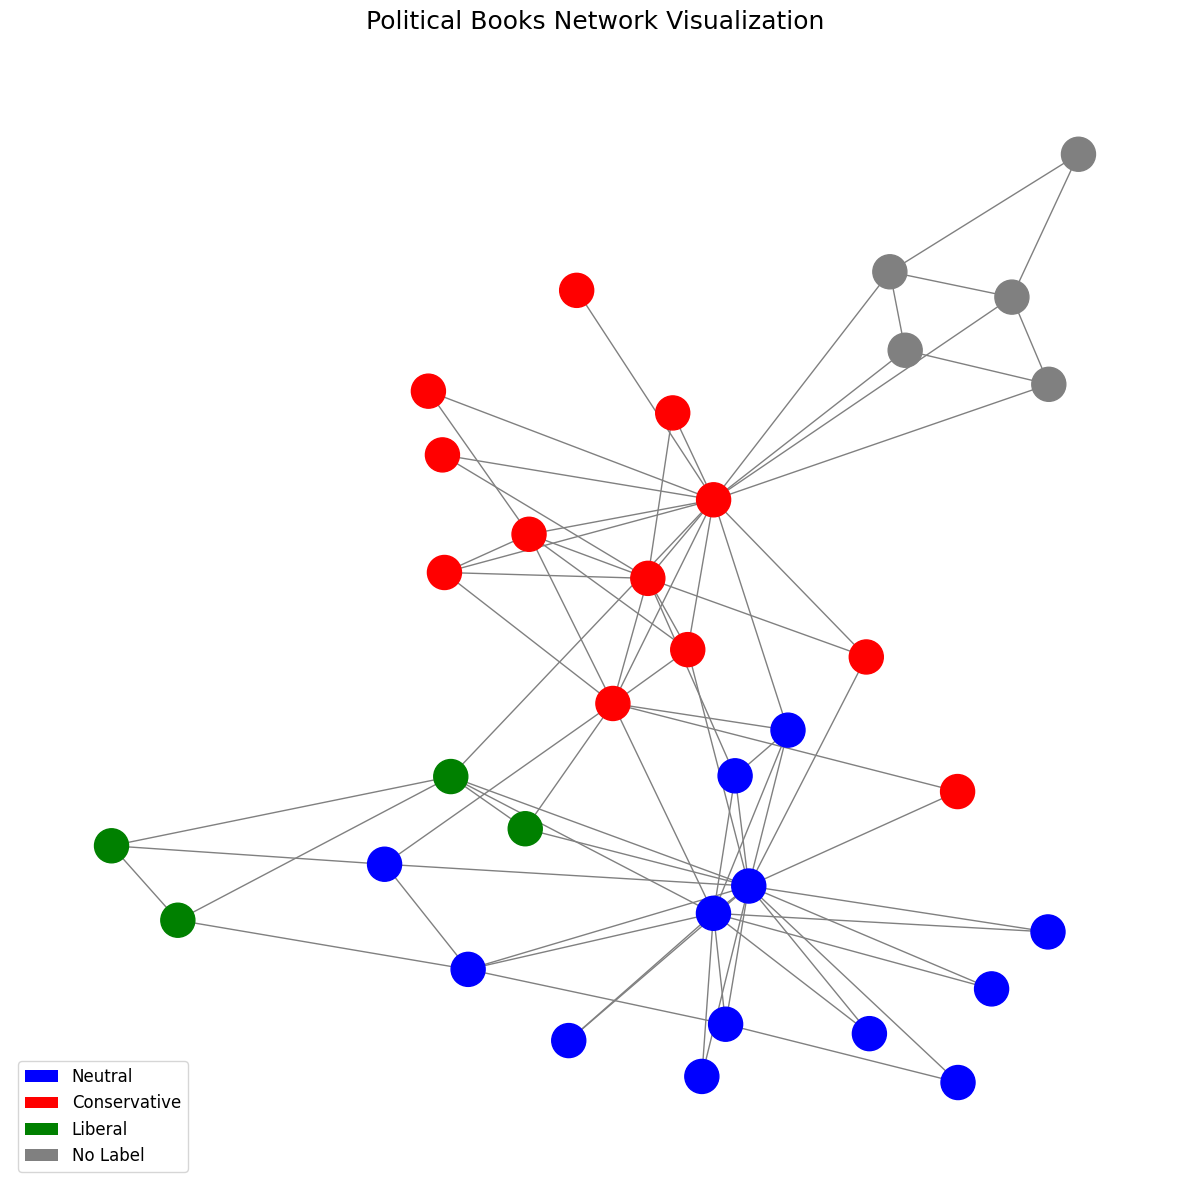

In [ ]:
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import matplotlib.colors as mcolors

# Преобразуем в NetworkX граф
G = to_networkx(data, to_undirected=True)

# Позиционирование узлов
pos = nx.spring_layout(G, seed=0)

# Список допустимых меток
valid_classes = [0, 1, 2]

node_color = [
    data.y[i].item() if data.y[i].item() in valid_classes else -1
    for i in range(G.number_of_nodes())
]

cmap = mcolors.ListedColormap(['gray', 'blue', 'red', 'green'])

# Отрисовка графа
plt.figure(figsize=(12, 12))
plt.axis('off')
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=False,
    node_size=600,
    node_color=node_color,
    cmap=cmap,
    vmin=-1,
    vmax=3,
    edge_color='gray',
    font_size=12
)

# Добавляем легенду
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor='blue', label='Neutral'),
    Patch(facecolor='red', label='Conservative'),
    Patch(facecolor='green', label='Liberal'),
    Patch(facecolor='gray', label='No Label')
]

plt.legend(
    handles=legend_elements,
    loc='lower left',
    fontsize=12,
    frameon=True
)

# Заголовок
plt.title("Political Books Network Visualization", fontsize=18, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z

model = GCN()
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []

# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()

    # Forward pass
    h, z = model(data.x, data.edge_index)

    # Calculate loss function
    loss = criterion(z, data.y)

    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), data.y)

    # Compute gradients
    loss.backward()

    # Tune parameters
    optimizer.step()

    # Store data for animations
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))

    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 1.51 | Acc: 11.76%
Epoch  10 | Loss: 1.28 | Acc: 38.24%
Epoch  20 | Loss: 1.05 | Acc: 38.24%
Epoch  30 | Loss: 0.81 | Acc: 70.59%
Epoch  40 | Loss: 0.57 | Acc: 73.53%
Epoch  50 | Loss: 0.41 | Acc: 91.18%
Epoch  60 | Loss: 0.29 | Acc: 97.06%
Epoch  70 | Loss: 0.20 | Acc: 100.00%
Epoch  80 | Loss: 0.15 | Acc: 100.00%
Epoch  90 | Loss: 0.12 | Acc: 100.00%
Epoch 100 | Loss: 0.09 | Acc: 100.00%
Epoch 110 | Loss: 0.08 | Acc: 100.00%
Epoch 120 | Loss: 0.06 | Acc: 100.00%
Epoch 130 | Loss: 0.05 | Acc: 100.00%
Epoch 140 | Loss: 0.05 | Acc: 100.00%
Epoch 150 | Loss: 0.04 | Acc: 100.00%
Epoch 160 | Loss: 0.04 | Acc: 100.00%
Epoch 170 | Loss: 0.03 | Acc: 100.00%
Epoch 180 | Loss: 0.03 | Acc: 100.00%
Epoch 190 | Loss: 0.03 | Acc: 100.00%
Epoch 200 | Loss: 0.02 | Acc: 100.00%


In [ ]:
%%capture
from IPython.display import HTML
from matplotlib import animation
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx
import numpy as np

plt.rcParams["animation.bitrate"] = 3000

# Цветовая карта (gray, blue, red, green)
cmap = plt.cm.get_cmap("hsv", 4)
custom_cmap = ['gray', 'blue', 'red', 'green']

# Подготовим граф один раз
G = to_networkx(data, to_undirected=True)
pos = nx.spring_layout(G, seed=0)

# Создаём фигуру
fig, ax = plt.subplots(figsize=(12, 12))
plt.axis('off')

# Легенда (фиксированная)
legend_elements = [
    Patch(facecolor='blue', label='Neutral'),
    Patch(facecolor='red', label='Conservative'),
    Patch(facecolor='green', label='Liberal'),
    Patch(facecolor='gray', label='No Label')
]
legend = ax.legend(handles=legend_elements, loc='lower left', fontsize=12, frameon=True)

# Функция отрисовки на каждый кадр
def animate(i):
    ax.clear()
    plt.axis('off')

    # Получаем метки на текущей эпохе
    raw = outputs[i]
    mapped_colors = [
        raw[j].item() if raw[j].item() in [0, 1, 2] else -1
        for j in range(len(raw))
    ]

    # Отрисовка графа
    nx.draw_networkx(
        G,
        pos=pos,
        with_labels=False,
        node_size=600,
        node_color=mapped_colors,
        cmap=plt.cm.get_cmap("hsv", 4),
        vmin=-1,
        vmax=3,
        edge_color="gray",
        ax=ax
    )

    # Заголовок с эпохой и метриками
    ax.set_title(
        f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
        fontsize=18,
        pad=20
    )

    # Добавляем легенду обратно
    ax.legend(handles=legend_elements, loc='lower left', fontsize=12, frameon=True)

frame_indices = np.arange(0, len(outputs), 10)

# Создаём анимацию
anim = animation.FuncAnimation(
    fig, animate, frame_indices,
    interval=500, repeat=True
)

html = HTML(anim.to_html5_video())

In [ ]:
display(html)

In [ ]:
print(f'Final embeddings = {h.shape}')
print(h)

Final embeddings = torch.Size([34, 3])
tensor([[2.5447e+00, 0.0000e+00, 0.0000e+00],
        [3.2676e+00, 0.0000e+00, 0.0000e+00],
        [2.5481e+00, 4.2734e-01, 0.0000e+00],
        [2.9408e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.4730e+00, 0.0000e+00, 0.0000e+00],
        [1.7723e+00, 1.3183e+00, 1.6896e+00],
        [2.3222e+00, 2.4437e-01, 1.2342e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.4045e+00, 9.0019e-03, 0.0000e+00],
        [2.2471e+00, 1.1396e-03, 0.0000e+00],
        [2.3549e+00, 2.9366e-02, 7.0864e-02],
        [1.6744e+00, 1.6461e+00, 1.8411e+00],
        [1.4547e+00, 1.4083e+00, 1.8446e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.1678e+00, 1.0616e-04, 0.0000e+00],
        [1.4179e+00, 1.3980e+00, 1.7810e+00],
        [2.2377e+00, 3.9736e-02, 8.6397e-02],
        [1.4690e+00, 1.4404e+00, 1.8511e+

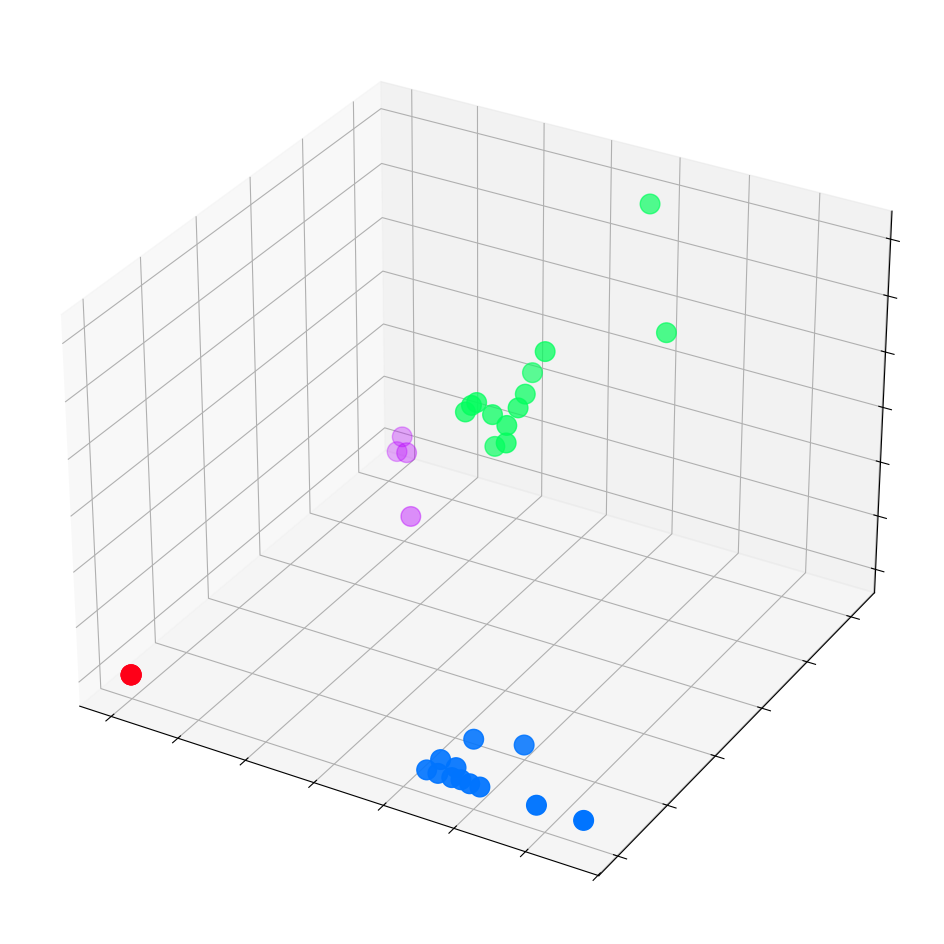

In [ ]:
# Get first embedding at epoch = 0
embed = h.detach().cpu().numpy()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.patch.set_alpha(0)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)

plt.show()

In [ ]:
%%capture

def animate(i):
    embed = embeddings[i].detach().cpu().numpy()
    ax.clear()
    ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=40)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')
ax = fig.add_subplot(projection='3d')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

anim = animation.FuncAnimation(fig, animate, \
              np.arange(0, 200, 10), interval=800, repeat=True)
html = HTML(anim.to_html5_video())

In [ ]:
display(html)

**4.** Сравнить точность GCN с другими моделями

In [ ]:
from torch_geometric.nn import GCNConv, GATConv
import torch.nn.functional as F
import torch.nn as nn

# GCN
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# GAT
class GAT(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads=4, concat=True)
        self.conv2 = GATConv(hidden_channels * 4, out_channels, heads=1, concat=False)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x

# MLP
class MLP(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.fc1 = nn.Linear(in_channels, hidden_channels)
        self.fc2 = nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index=None):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
def train(model, data, optimizer):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    acc = (pred[data.test_mask] == data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
    return acc

In [ ]:
models = {
    "GCN": GCN(data.num_features, 16, int(data.y.max()) + 1),
    "GAT": GAT(data.num_features, 8, int(data.y.max()) + 1),
    "MLP": MLP(data.num_features, 32, int(data.y.max()) + 1),
}

results = {}

for name, model in models.items():
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    for epoch in range(200):
        loss = train(model, data, optimizer)
    acc = test(model, data)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

GCN Accuracy: 1.0000
GAT Accuracy: 1.0000
MLP Accuracy: 0.0000


**GCN / GAT = 100%**  
- Модели используют структуру графа — то есть связи между книгами.

- Значит, структура графа очень хорошо отражает классы (например, книги одной партии тесно связаны).

**MLP = 0%**  
- MLP работает только с признаками (data.x).

- Раз у него 0% точности, значит признаки узлов сами по себе бесполезны — они не несут различимой информации о классе.